# ABOUT DATASET

Fossil emissions measure the quantity of carbon dioxide (CO₂) emitted from the burning of fossil fuels, and directly from industrial processes such as cement and steel production.

Fossil CO₂ includes emissions from coal, oil, gas, flaring, cement, steel, and other industrial processes.

Fossil emissions do not include land use change, deforestation, soils, or vegetation.

# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot

import warnings
warnings.filterwarnings('ignore')

# Getting Overview of Data

In [2]:
df = pd.read_csv('co-emissions-per-capita new.csv')

In [3]:
df.head()

,Entity,Year,Annual CO₂ emissions (per capita)
0,Africa,1750,0
1,Andorra,1750,0
2,Asia,1750,0
3,Asia (excl. China and India),1750,0
4,Australia,1750,0


# Inspecting Dataset Structure

In [4]:
df.shape

(26600, 3)

In [5]:
df.isnull().sum()

Entity                               0
Year                                 0
Annual CO₂ emissions (per capita)    0
dtype: int64

In [6]:
df['Entity'].value_counts().head(10)

Entity
Africa                           228
High-income countries            228
Andorra                          228
World                            228
Upper-middle-income countries    228
United Kingdom                   228
Singapore                        228
Sierra Leone                     228
Papua New Guinea                 228
Oceania                          228
Name: count, dtype: int64

In [7]:
df['Year'].value_counts()

Year
2022    231
2013    231
2004    231
2005    231
2006    231
       ... 
1790     28
1760     27
1780     27
1770     27
1750     27
Name: count, Length: 228, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26600 entries, 0 to 26599
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Entity                             26600 non-null  object
 1   Year                               26600 non-null  int64 
 2   Annual CO₂ emissions (per capita)  26600 non-null  object
dtypes: int64(1), object(2)
memory usage: 623.6+ KB


In [9]:
df["Annual CO₂ emissions (per capita)"]= df["Annual CO₂ emissions (per capita)"].str.replace(".", "")

In [10]:
df['Annual CO₂ emissions (per capita)'] = df['Annual CO₂ emissions (per capita)'].astype('int')

In [11]:
df.describe()

,Year,Annual CO₂ emissions (per capita)
count,26600.000000,2.660000e+04
mean,1949.096880,2.182557e+07
std,56.387496,2.325755e+07
min,1750.000000,0.000000e+00
25%,1915.000000,5.485310e+06
50%,1963.000000,1.327592e+07
75%,1994.000000,3.113626e+07
max,2022.000000,1.568619e+08


In [12]:
df['Entity'].unique()

array(['Africa', 'Andorra', 'Asia', 'Asia (excl. China and India)',
       'Australia', 'Bhutan', 'Brunei', "Cote d'Ivoire", 'Europe',
       'Europe (excl. EU-27)', 'Europe (excl. EU-28)',
       'European Union (28)', 'Greenland', 'Guinea',
       'High-income countries', 'Low-income countries',
       'Lower-middle-income countries', 'Mauritania', 'North America',
       'North America (excl. USA)', 'Oceania', 'Papua New Guinea',
       'Sierra Leone', 'Singapore', 'United Kingdom',
       'Upper-middle-income countries', 'World', 'Canada',
       'European Union (27)', 'Germany', 'Macao', 'Poland', 'Tuvalu',
       'United States', 'Belgium', 'France', 'Austria', 'Norway',
       'Armenia', 'Belarus', 'Estonia', 'Georgia', 'Hungary',
       'Kazakhstan', 'Kyrgyzstan', 'Latvia', 'Lithuania', 'Moldova',
       'Russia', 'Spain', 'Tajikistan', 'Turkmenistan', 'Ukraine',
       'Uzbekistan', 'Sweden', 'Denmark', 'Netherlands', 'Ireland',
       'India', 'Romania', 'Switzerland', 'Azerb

## Exploratory Data Analysis (EDA)

In [19]:
Countries_with_Highest_Emission = df.groupby('Entity')['Annual CO₂ emissions (per capita)'].sum().sort_values(ascending = False).head(10)

In [20]:
Countries_with_Lowest_Emission = df.groupby('Entity')['Annual CO₂ emissions (per capita)'].sum().sort_values(ascending = True).head(10)

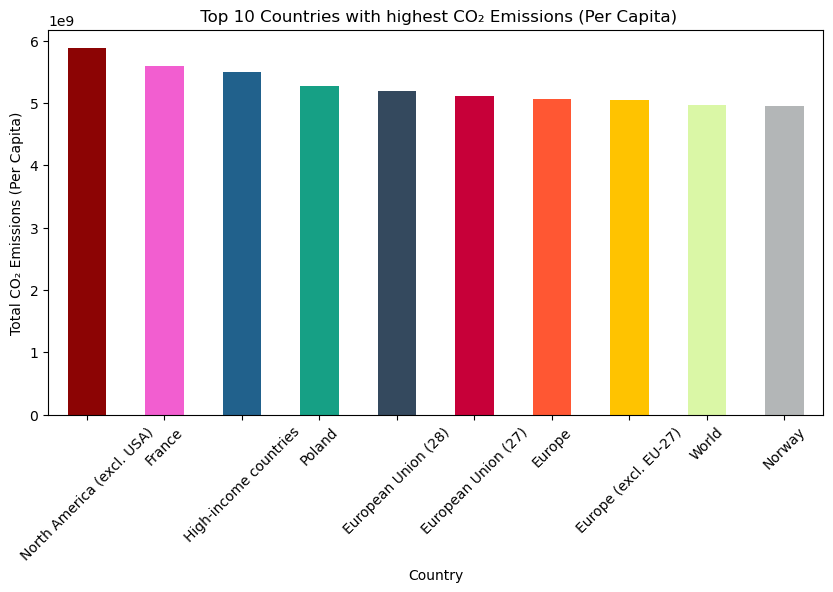

In [23]:
# Bar Plot
plt.figure(figsize=(10, 5))
Countries_with_Highest_Emission.plot(kind='bar', color=["#8c0404","#f25ed0","#21618C","#16A085","#34495E",
          "#C70039", "#FF5733", "#FFC300", "#DAF7A6", "#B3B6B7"])
plt.title(" Top 10 Countries with highest CO₂ Emissions (Per Capita)")
plt.xlabel("Country")
plt.ylabel("Total CO₂ Emissions (Per Capita)")
plt.xticks(rotation=45)
plt.show()

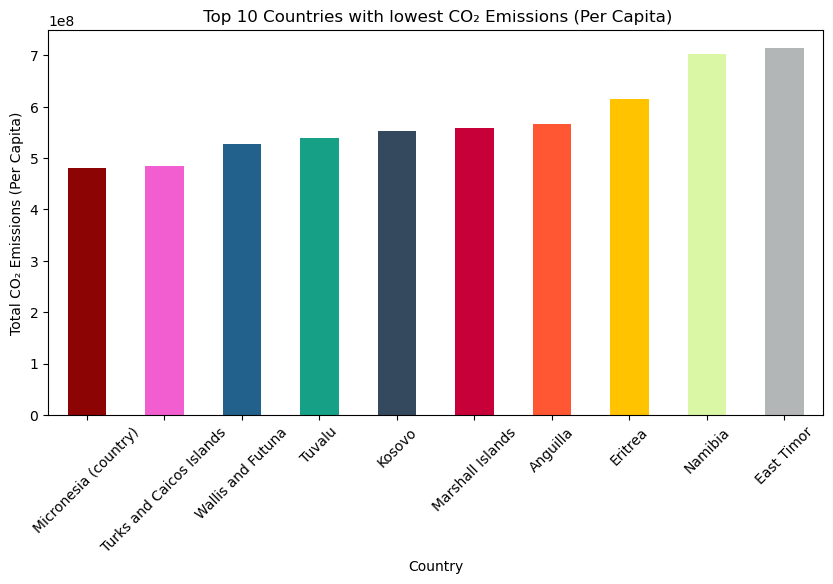

In [24]:
# Bar Plot
plt.figure(figsize=(10, 5))
Countries_with_Lowest_Emission.plot(kind='bar', color=["#8c0404","#f25ed0","#21618C","#16A085","#34495E",
          "#C70039", "#FF5733", "#FFC300", "#DAF7A6", "#B3B6B7"])
plt.title(" Top 10 Countries with lowest CO₂ Emissions (Per Capita)")
plt.xlabel("Country")
plt.ylabel("Total CO₂ Emissions (Per Capita)")
plt.xticks(rotation=45)
plt.show()

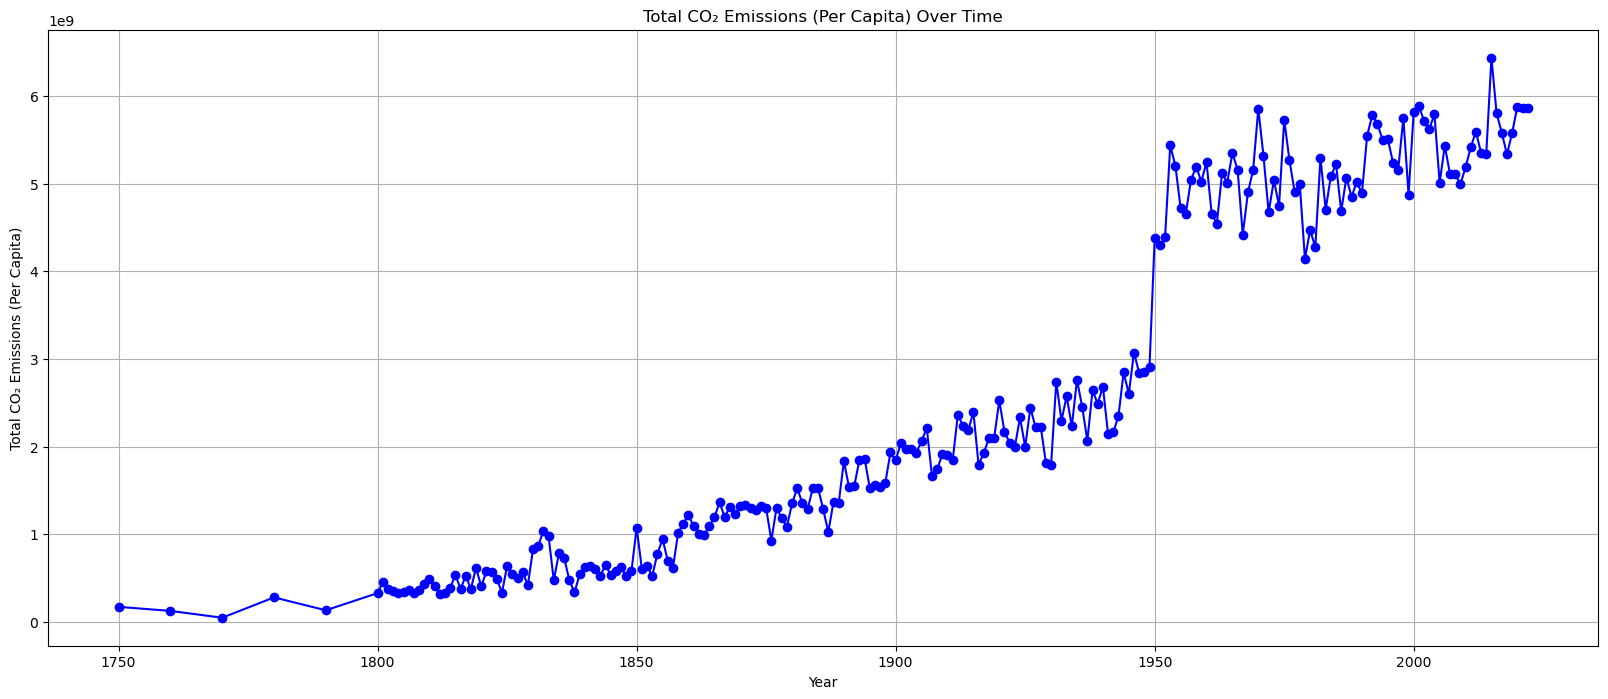

In [34]:
# Total CO₂ Emissions (Per Capita) Over Time

# Step 1: Group the data by 'Year' and sum the CO₂ emissions per capita
yearly_emissions = df.groupby('Year')['Annual CO₂ emissions (per capita)'].sum()

# Step 2: Plot the time series data
plt.figure(figsize=(20, 8))
plt.plot(yearly_emissions.index, yearly_emissions.values, color='blue', marker='o')
plt.title("Total CO₂ Emissions (Per Capita) Over Time")
plt.xlabel("Year")
plt.ylabel("Total CO₂ Emissions (Per Capita)")
plt.grid(True)
plt.show()

In [91]:
# filter data for the years 2000-2022

df_subset = df[(df['Year'] >= 2000) & (df['Year']<= 2022)]   

df_subset

,Entity,Year,Annual CO₂ emissions (per capita)
21291,Afghanistan,2000,53580754
21292,Africa,2000,11373366
21293,Albania,2000,95062864
21294,Algeria,2000,27749681
21295,Andorra,2000,79247384
...,...,...,...
26595,Wallis and Futuna,2022,22819076
26596,World,2022,4658219
26597,Yemen,2022,33701748
26598,Zambia,2022,44570068


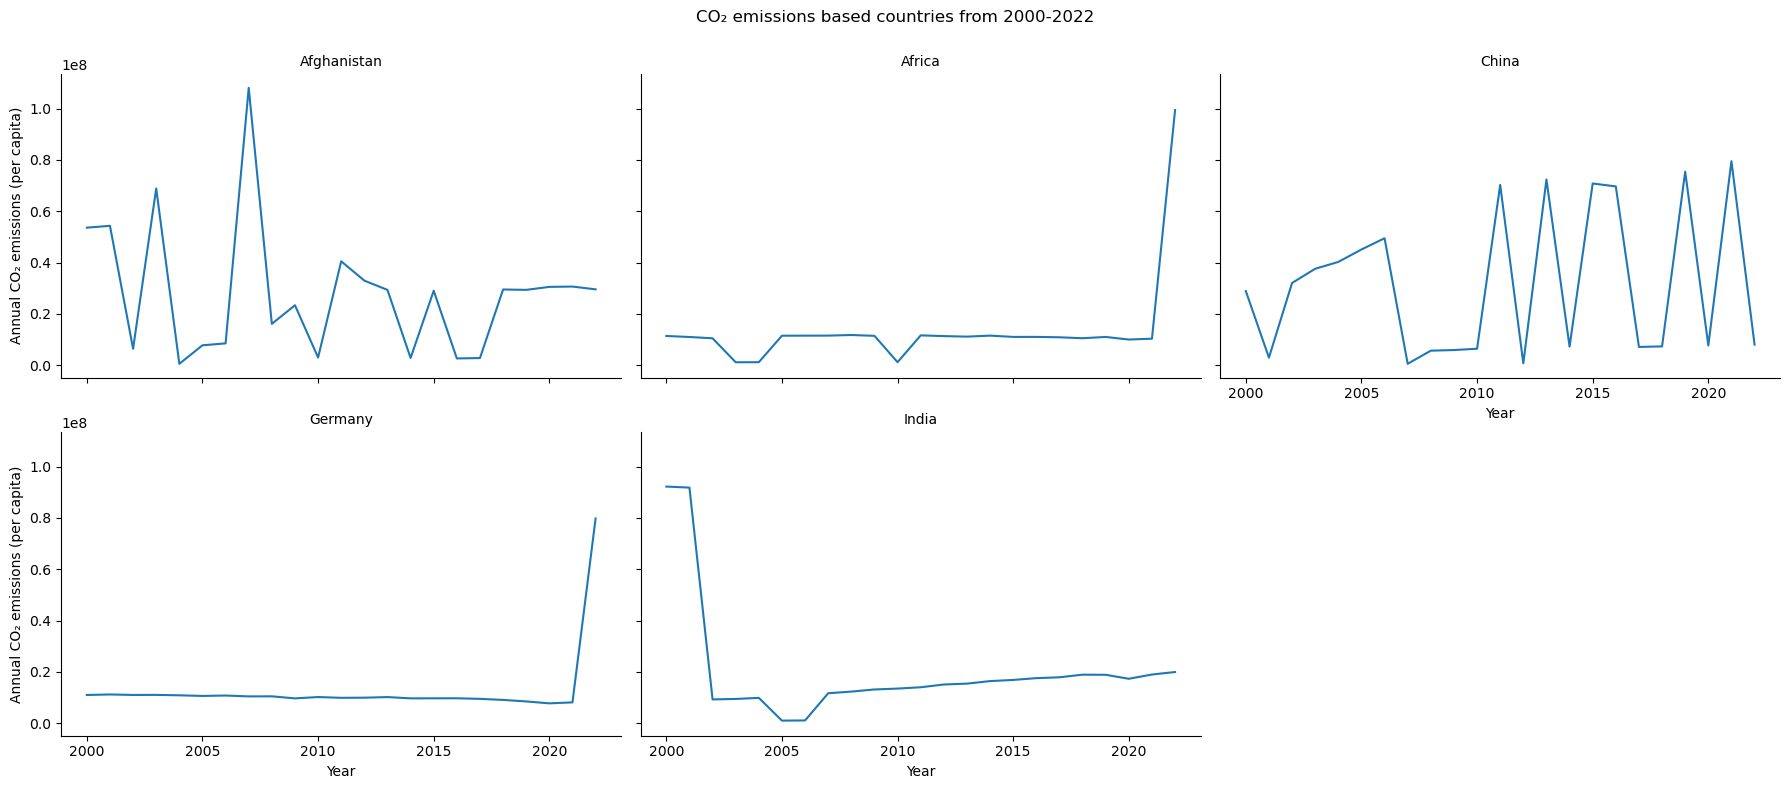

In [93]:

#define the list of selected countries

selected_countries = ['China', 'India', 'Germany', 'Afghanistan','Africa']

# filter the dataset to include only the selected countries

df_countries = df_subset[df_subset['Entity'].isin(selected_countries)]



# create a facegrid for faceting


g = sns.FacetGrid(df_countries, col='Entity', col_wrap=3, height =4, aspect=1.5)

# map a lineplot onto each facet

g.map(sns.lineplot,'Year','Annual CO₂ emissions (per capita)')

#add titles and lables

g.set_axis_labels(x_var='Year', y_var='Annual CO₂ emissions (per capita)')
g.set_titles(col_template='{col_name}')

plt.subplots_adjust(top=0.9)
plt.suptitle('CO₂ emissions based countries from 2000-2022')
plt.show()
